In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 27 16:35:06 2018

@author: Bart van Voorden
"""
import sys, os

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import seaborn, pickle, datetime
seaborn.set("notebook",font_scale=1.45)

sqrt, e, pi = np.sqrt, np.e, np.pi
cos, sin = np.cos, np.sin

def c_d1(lab0, theta):
    return 2*(1+lab0**2 -2*lab0*cos(theta))

def c_d2(lab0, theta):
    return 2*(1+lab0**2 +2*lab0*cos(theta))

def c_h(k, lab0, theta):
    return 2*cos(k/2) * (1-lab0**2) - 4* sin(theta)*sin(k/2)*lab0

def c_ht(k, lab0, theta):
    return 2*sin(k/2) * (1-lab0**2) + 4* sin(theta)*cos(k/2)*lab0

def create_hamiltonian(N, k, lab0, theta):
    d1, d2 = c_d1(lab0, theta), c_d2(lab0, theta)
    d = d1+d2
    h, ht = c_h(k, lab0, theta), c_ht(k, lab0, theta)
    
    ham = np.diag([d2] + [d]*(N-2) + [d1])
    ham += np.diag([h]*(N-1),1)
    ham += np.diag([h]*(N-1),-1)
    ham[N-1,0] = ht
    ham[0,N-1] = ht
    
    return ham

def calc_eigs_point(N=3, k=2*pi/3, lab0=1, theta=0.1):
    Ham = create_hamiltonian(N, k, lab0, theta)
    eigvals, eigvecs = la.eig(Ham)
    idx = eigvals.argsort()[::1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]
    
    return eigvals.real, eigvecs

def calc_eigs_alltheta(N=3, k=2*pi/3, lab0=1, numtheta=101, plot_vals=True):
    eigvals, eigvecs = [], []
    
    thetarange = np.linspace(0, 2*pi, numtheta)
    for theta in thetarange:
        vals, vecs = calc_eigs_point(N, k, lab0, theta)
        eigvals.append(vals)
        eigvecs.append(vecs)
    
    eigvals, eigvecs = np.array(eigvals), np.array(eigvecs)
    if plot_vals:
        kval = int(N * k / (2*pi))
        names_axes = (r"$\theta$ (units of $\pi$)", r"$E$") 
        title = r"$N=${}, $k=${}$\pi/${}, $\lambda=${}$e^{{i \theta}}$".format(N,2* kval,N, lab0)
        multiline(thetarange/pi, eigvals.transpose(), title=title, names_axes=names_axes )
        
    return np.array(eigvals), np.array(eigvecs)
    
    
def multiline(datax, dataylist, names=None, names_axes=None, title=None, legend=False):
    #seaborn.set_palette(seaborn.hls_palette(len(dataylist), l=.6, s=.8))
    fig, ax1 = plt.subplots(1)
    
       
    for i in range(len(dataylist)):
        if names == None: 
            ax1.plot(datax, dataylist[i], label='{}'.format(i))
        else:
            ax1.plot(datax, dataylist[i], label='{}'.format(names[i]))
    
    if legend==True:
        legend = plt.legend(frameon=True)
        frame = legend.get_frame()
        frame.set_facecolor('white')
    
    if names_axes:
        ax1.set_xlabel(names_axes[0])
        ax1.set_ylabel(names_axes[1])
    
    if title:
        plt.title(title)
    

In [2]:
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
def plot_eigs_alltheta(N, p, q):
    lab0=1
    numtheta=101
    k=p*pi/q
    eigvals, eigvecs = [], []
    
    thetarange = np.linspace(0, 2*pi, numtheta)
    for theta in thetarange:
        vals, vecs = calc_eigs_point(N, k, lab0, theta)
        eigvals.append(vals)
        eigvecs.append(vecs)
    
    eigvals, eigvecs = np.array(eigvals), np.array(eigvecs)
    
    names_axes = (r"$\theta$ (units of $\pi$)", r"$E$") 
    title = r"$N=${}, $k=${}$\pi/${}, $\lambda=${}$e^{{i \theta}}$".format(N,p,q, lab0)
    multiline(thetarange/pi, eigvals.transpose(), title=title, names_axes=names_axes )

from ipywidgets import interactive
interactive_plot = interactive(plot_eigs_alltheta, N=(3, 10, 1), p=(-10,10,1),q=(3,10,1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=6, description='N', max=10, min=3), IntSlider(value=0, description='p', max=10, min=-10), IntSlider(value=6, description='q', max=10, min=3), Output()), _dom_classes=('widget-interact',))

In [4]:
def plot_eigvector(N, p, q, t):
    theta = t*pi
    lab0=1
    k=p*pi/q
    numtheta=101
    
    fig, axes = plt.subplots(1,2, figsize=(16,7))
    ax1,ax2 = axes
    suptitle = r"$N=${}, $k=${}$\pi/${}, $\lambda_0=${}, $\theta=${}$\pi$".format(N,p,q, lab0, t) 
    fig.suptitle(suptitle, size=18)
    
    vals, vecs = calc_eigs_point(N, k, lab0, theta)  
    title1 = r"Eigenvectors"
    names_axes = (r"$\left|L\right>$", r"$\psi$") 
    
    ax1.bar(np.linspace(1,2*N-1,N)-0.42, vecs[:,0])
    ax1.bar(np.linspace(1,2*N-1,N)+0.42, vecs[:,1])
    ax1.set_title(title1)
    ax1.set_xlabel(names_axes[0])
    ax1.set_ylabel(names_axes[1])
    ax1.set_xticks(np.linspace(1,2*N-1,N))
    ax1.set_ylim((-1,1))
    
    
    eigvals= []
    thetarange = np.linspace(0, 2*pi, numtheta)
    for theta in thetarange:
        vals, troep = calc_eigs_point(N, k, lab0, theta)
        eigvals.append(vals)
    
    eigvals = np.array(eigvals)
    
    names_axes2 = (r"$\theta$ (units of $\pi$)", r"$E$") 
    title2 = r"Eigenvalues"
    for i in range(len(vals)):
        ax2.plot(thetarange/pi, eigvals.transpose()[i])
        
    ax2.plot([t, t], [-1,eigvals.max()*1.1],c='black', linestyle='--')
    ax2.set_ylim((-1,eigvals.max()*1.1))
    ax2.set_xlabel(names_axes2[0])
    ax2.set_ylabel(names_axes2[1])
    ax2.set_title(title2)


from ipywidgets import interactive, interact,fixed, FloatSlider, IntSlider
interactive_plot = interact(plot_eigvector, N=IntSlider(min=3, max=10, step=1, continuous_update=False),
                            p=IntSlider(min=-10, max=10, step=1, continuous_update=False),
                            q=IntSlider(min=3,max=10,step=1, continuous_update=False), 
                            t=FloatSlider(min=0,max=2,step=0.01,continuous_update=False))

interactive(children=(IntSlider(value=3, continuous_update=False, description='N', max=10, min=3), IntSlider(value=0, continuous_update=False, description='p', max=10, min=-10), IntSlider(value=3, continuous_update=False, description='q', max=10, min=3), FloatSlider(value=0.0, continuous_update=False, description='t', max=2.0, step=0.01), Output()), _dom_classes=('widget-interact',))

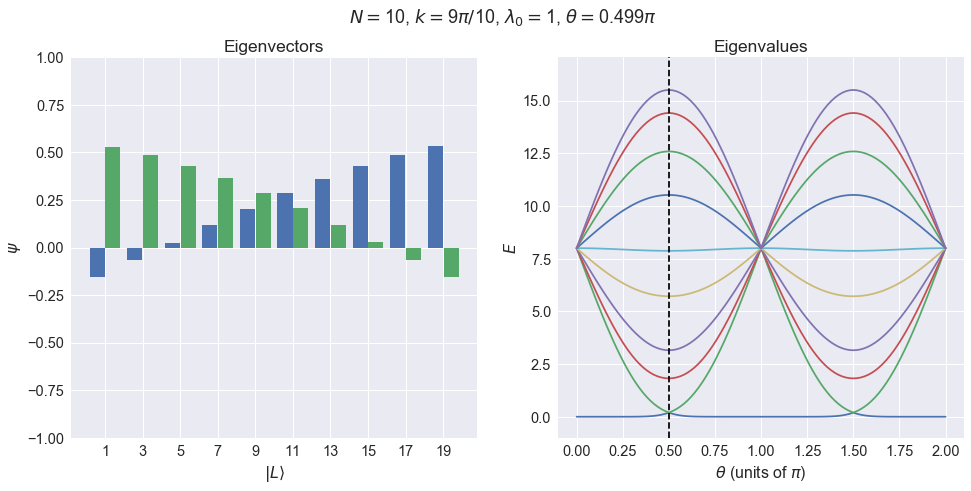

In [8]:
plot_eigvector(10, 9, 10, 0.499)